In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import files
upload=files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (4).csv


In [ ]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

For forecasting, we use:
Order Date
Sales,Profit

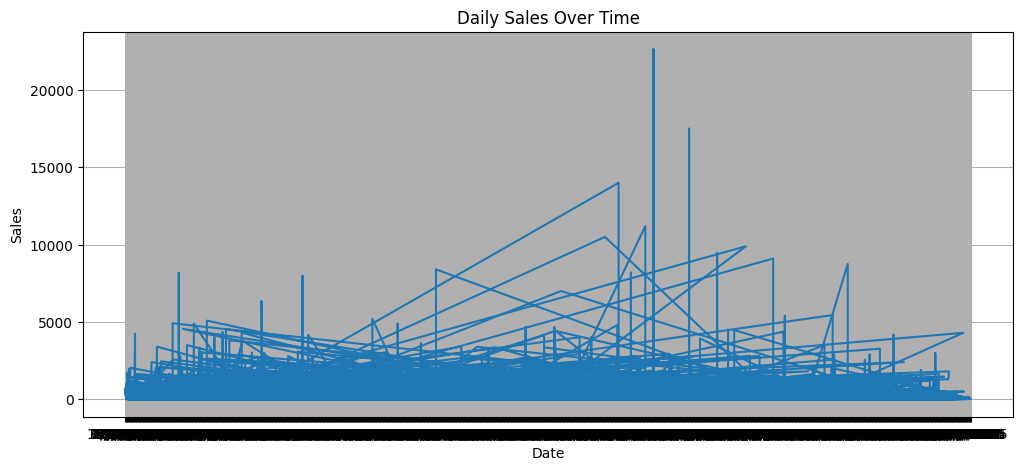

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Order Date'], df['Sales'])
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

/tmp/ipython-input-4060689459.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_indexed['Sales'].resample('M').sum()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Order Date'>

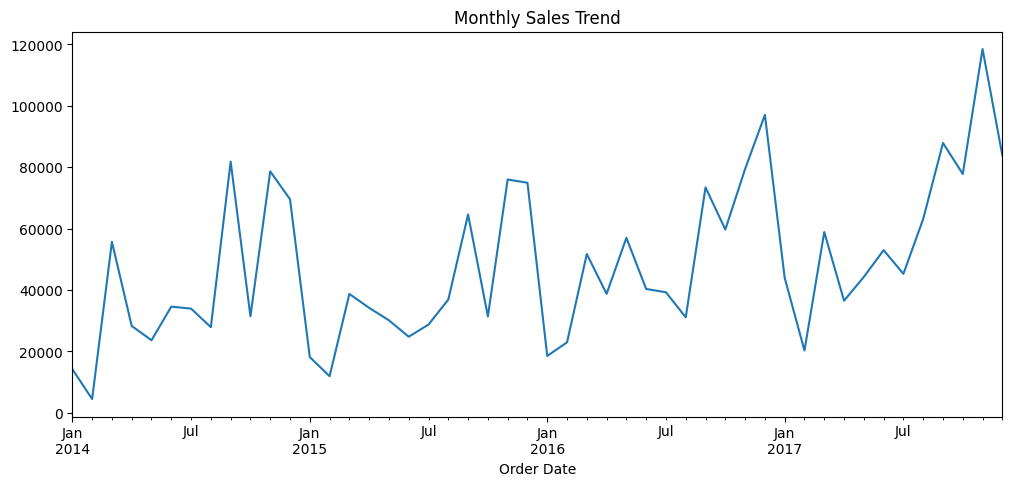

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
df_indexed = df.set_index('Order Date')
monthly = df_indexed['Sales'].resample('M').sum()
monthly.plot(figsize=(12,5), title="Monthly Sales Trend")

<Axes: title={'center': 'Weekly Sales Trend'}, xlabel='Order Date'>

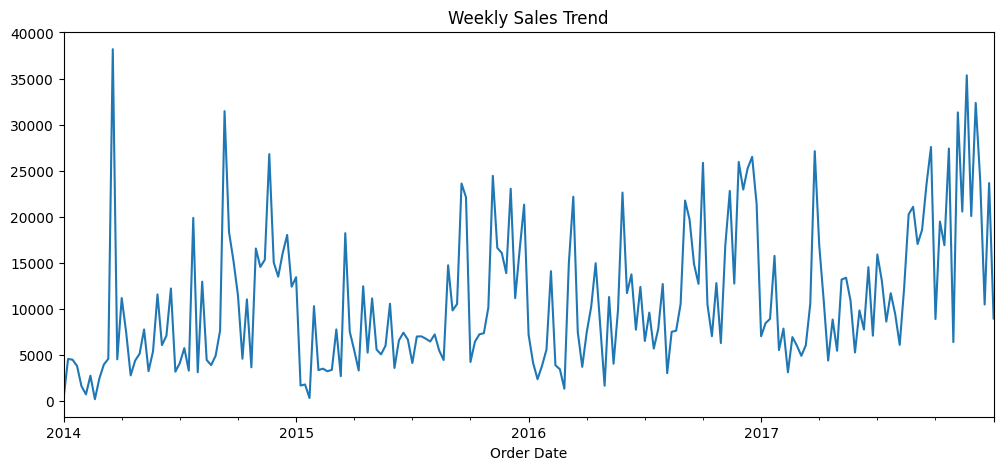

In [ ]:
weekly = df_indexed['Sales'].resample('W').sum()
weekly.plot(figsize=(12,5), title="Weekly Sales Trend")

/tmp/ipython-input-895408237.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df_indexed['Sales'].resample('Y').sum()


<Axes: title={'center': 'Yearly Sales Trend'}, xlabel='Order Date'>

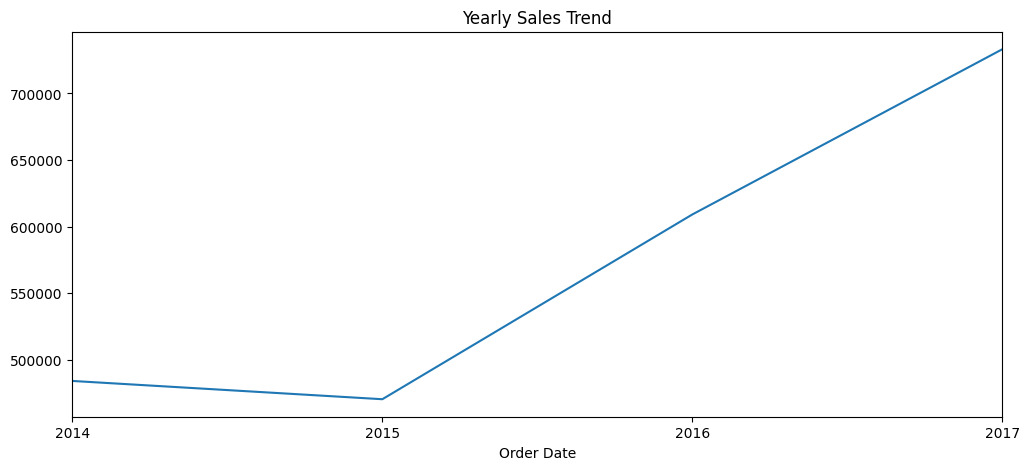

In [ ]:
yearly = df_indexed['Sales'].resample('Y').sum()
yearly.plot(figsize=(12,5), title="Yearly Sales Trend")

In [ ]:
prophet_df = df.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [ ]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

model.fit(prophet_df)

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

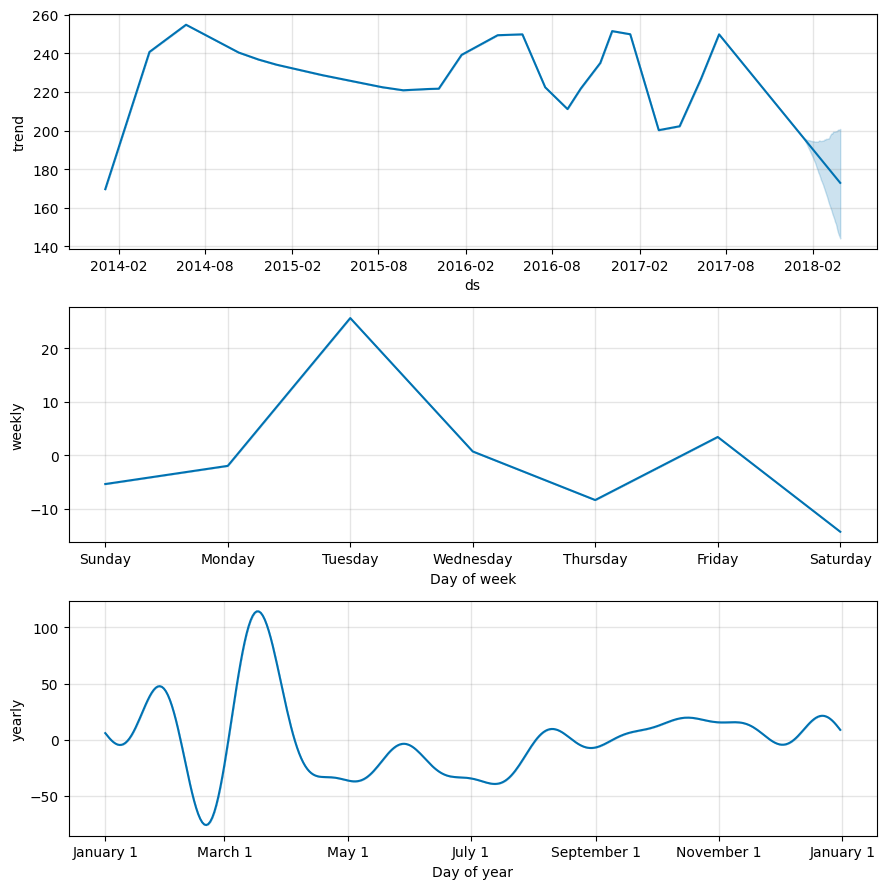

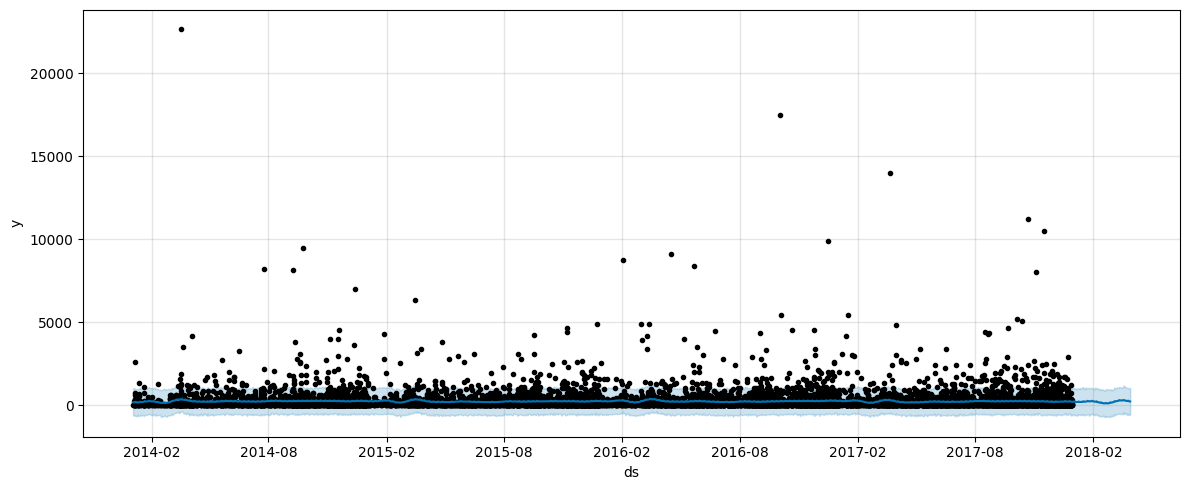

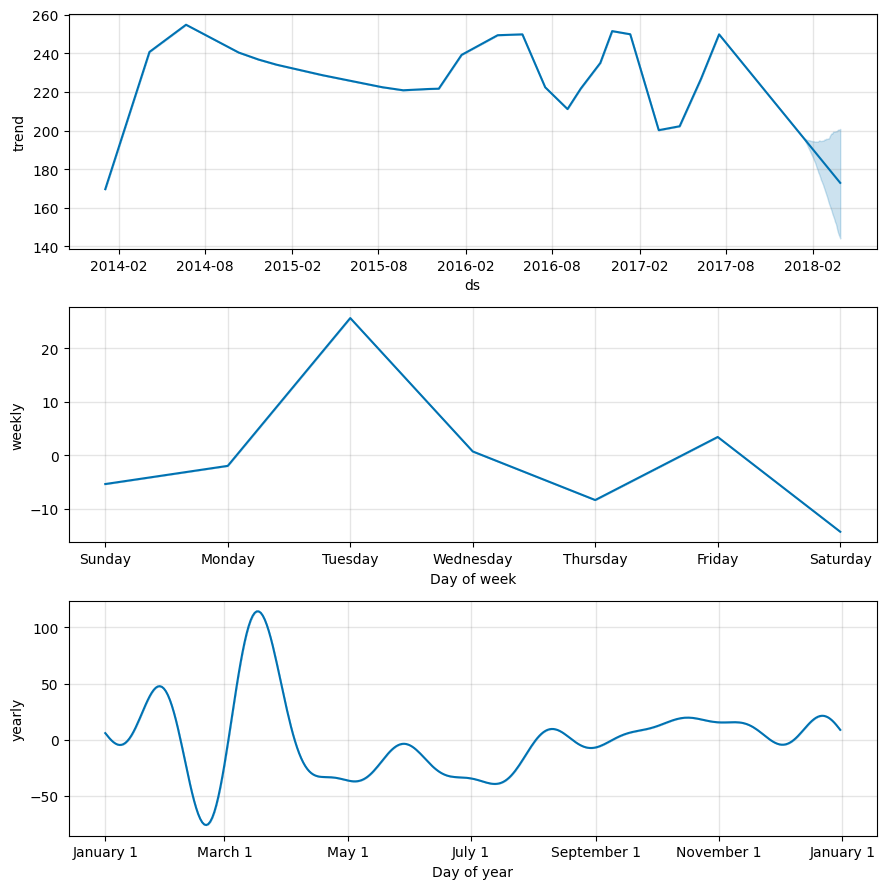

In [ ]:
model.plot(forecast, figsize=(12,5))
model.plot_components(forecast)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv("superstore_forecast_output.csv", index=False)